# Project Part 1

[![Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/sgeinitz/cs39aa_project/blob/main/project_part1.ipynb)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/sgeinitz/cs39aa_project/blob/main/project_part1.ipynb)


## Introduction/Background

For this project I will be a dataset that contains job titles and their descriptions in an attempt to predict fake jobs. This data contains 18K job descriptions with 800 of those jobs being fake. I will be looking at the descriptions to figure out patterns in the words themselves to find what makes a fake job description fake. due to that nature this data set will be a text classification problem with the lables being binary, either real or fake.


## Exploratory Data Analysis

Here are some Exploratory Analysis that was done. In this Data check I wanted to find what the stopwords that each description contained and the average word count for each description (incase I need to add more fake jobs to the data myself)


In [1]:
# import all of the python modules/packages you'll need here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk 
from collections import Counter
from nltk.tokenize import RegexpTokenizer 
# ...

In [2]:
df = pd.read_csv('../input/real-or-fake-jobs/fake_job_postings.csv', usecols=['title','description','fraudulent'])
df

,title,description,fraudulent
0,Marketing Intern,"Food52, a fast-growing, James Beard Award-winn...",0
1,Customer Service - Cloud Video Production,Organised - Focused - Vibrant - Awesome!Do you...,0
2,Commissioning Machinery Assistant (CMA),"Our client, located in Houston, is actively se...",0
3,Account Executive - Washington DC,THE COMPANY: ESRI – Environmental Systems Rese...,0
4,Bill Review Manager,JOB TITLE: Itemization Review ManagerLOCATION:...,0
...,...,...,...
17875,Account Director - Distribution,Just in case this is the first time you’ve vis...,0
17876,Payroll Accountant,The Payroll Accountant will focus primarily on...,0
17877,Project Cost Control Staff Engineer - Cost Con...,Experienced Project Cost Control Staff Enginee...,0
17878,Graphic Designer,Nemsia Studios is looking for an experienced v...,0


<AxesSubplot:>

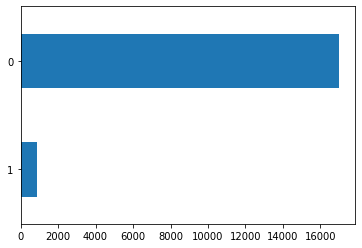

In [3]:
df['fraudulent'].value_counts().sort_values().plot(kind = 'barh')

In [4]:
df.dropna(inplace=True)
df[df['description'].apply(len)<9]

,title,description,fraudulent
3030,mobile apps for Android/iOS developer,#NAME?,0
3951,Senior Java Developer with Hadoop Exp,#NAME?,0
4184,Senior Architect / Technician,#NAME?,0
7612,Mobile Marketing Specialist,#NAME?,0
11893,Junior Specialist - Seed Production and Harvest,#NAME?,0
12189,Researcher - Nutrient and Crop Management,#NAME?,0
13529,Full-time Web Developer,#NAME?,0
16690,Marketing Lead,#NAME?,0


In [5]:
df['wordcount'] = df.description.apply(lambda x: len(x.split()))
df.head()

,title,description,fraudulent,wordcount
0,Marketing Intern,"Food52, a fast-growing, James Beard Award-winn...",0,124
1,Customer Service - Cloud Video Production,Organised - Focused - Vibrant - Awesome!Do you...,0,315
2,Commissioning Machinery Assistant (CMA),"Our client, located in Houston, is actively se...",0,50
3,Account Executive - Washington DC,THE COMPANY: ESRI – Environmental Systems Rese...,0,346
4,Bill Review Manager,JOB TITLE: Itemization Review ManagerLOCATION:...,0,168


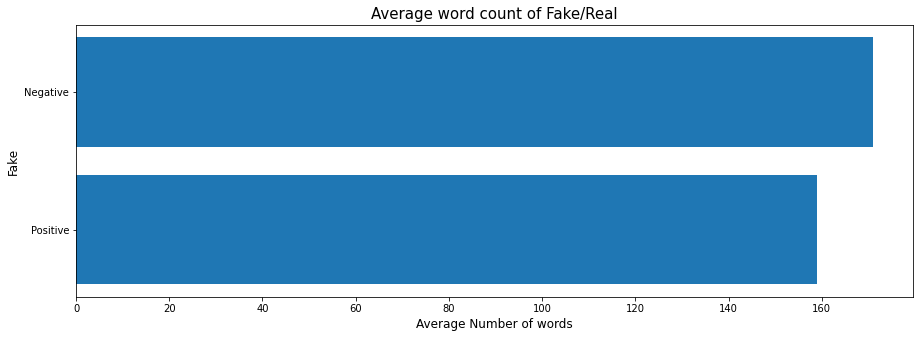

In [6]:
avg_pos = df[df.fraudulent ==1].description.apply(lambda x: len(x.split())).mean()
avg_neg = df[df.fraudulent ==0].description.apply(lambda x: len(x.split())).mean()

plt.figure(figsize=(15,5))
plt.barh(['Positive', 'Negative'], [avg_pos,avg_neg])
plt.xlabel('Average Number of words', fontsize=12)
plt.ylabel('Fake', fontsize=12)
plt.title('Average word count of Fake/Real', fontsize=15)
plt.show()

In [7]:
stpwrd = Counter(" ".join(df["description"]).split()).most_common(20)
stpwrd

[('and', 174343),
 ('to', 95597),
 ('the', 88957),
 ('of', 67291),
 ('a', 61705),
 ('in', 52027),
 ('for', 45884),
 ('with', 40483),
 ('is', 28663),
 ('our', 27334),
 ('are', 22412),
 ('will', 22207),
 ('be', 20900),
 ('on', 18442),
 ('as', 18097),
 ('you', 18027),
 ('an', 14395),
 ('that', 14311),
 ('team', 12635),
 ('work', 12265)]